In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

### Lets load the California House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
cali_data = fetch_california_housing()

In [4]:
cali_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## lets check the description of the dataset
print(cali_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(cali_data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(cali_data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(cali_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Preparing the Dataset

In [9]:
dataset = pd.DataFrame(cali_data.data, columns=cali_data.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset["Price"] = cali_data.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
## summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
## check for missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Exploratory Data Analysis

In [16]:
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


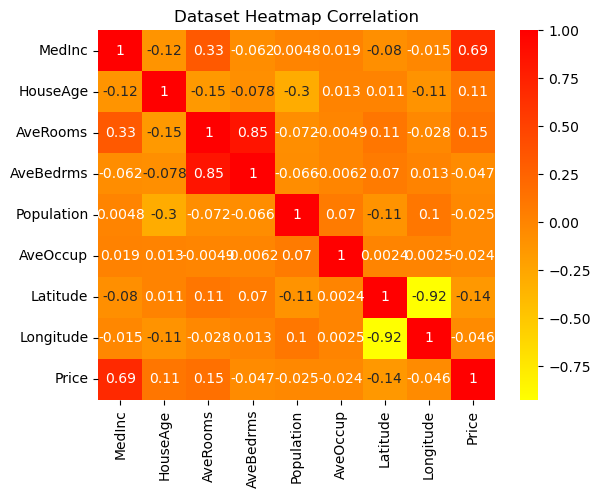

In [17]:
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.autumn_r)

plt.title("Dataset Heatmap Correlation")
plt.show()

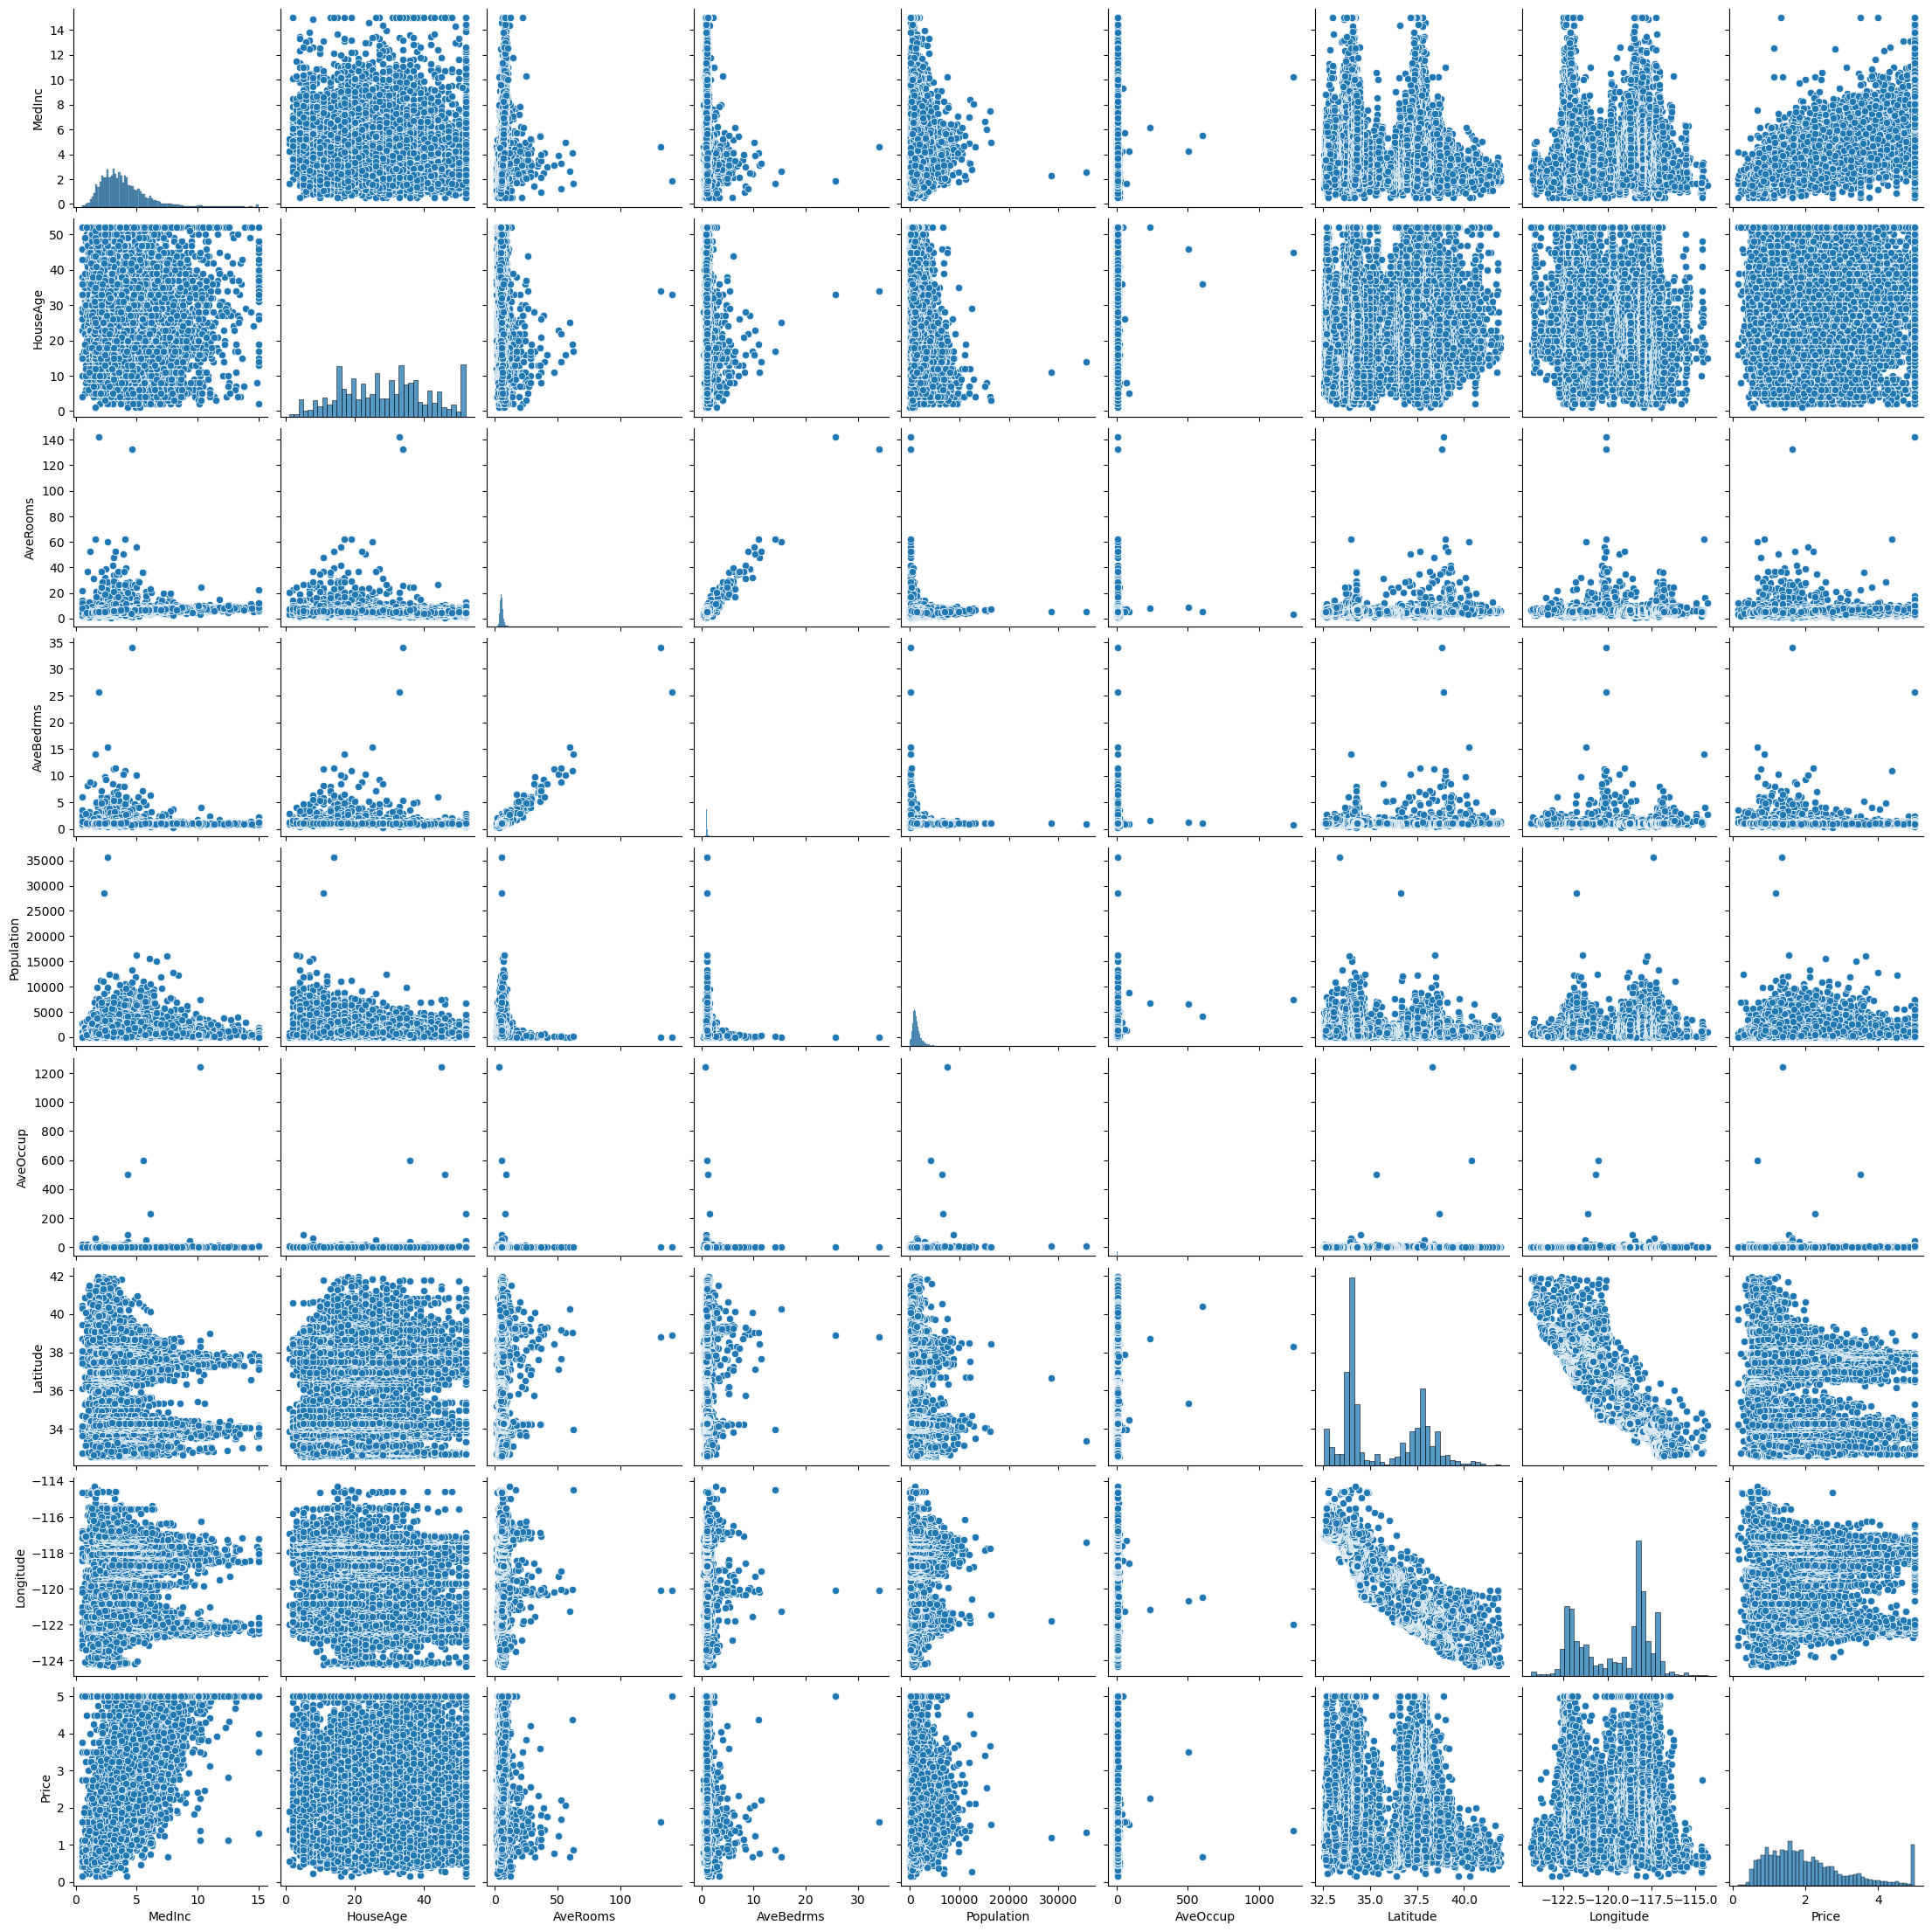

In [18]:
sns.pairplot(dataset)

### Analyzing the Correlated Features

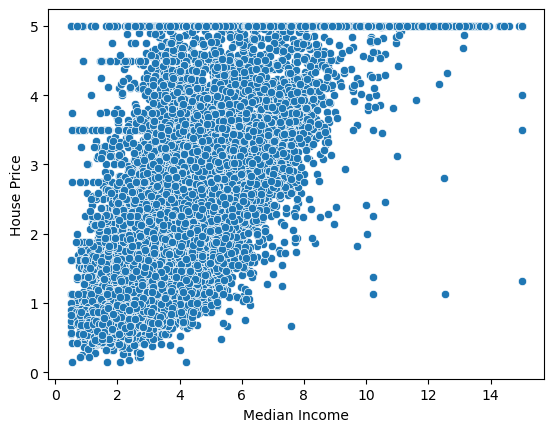

In [19]:
sns.scatterplot(x="MedInc", y="Price", data=dataset)

plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

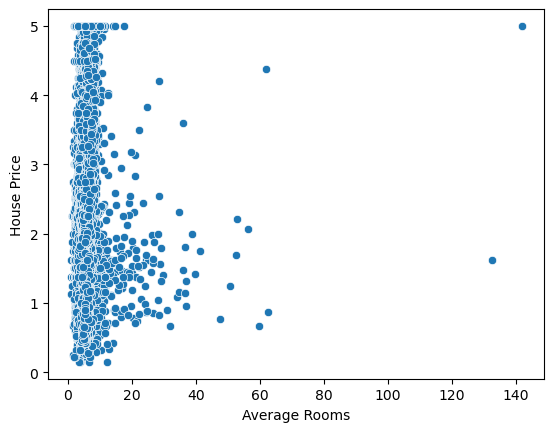

In [20]:
sns.scatterplot(x="AveRooms", y="Price", data=dataset)

plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.show()

<Axes: xlabel='MedInc', ylabel='Price'>

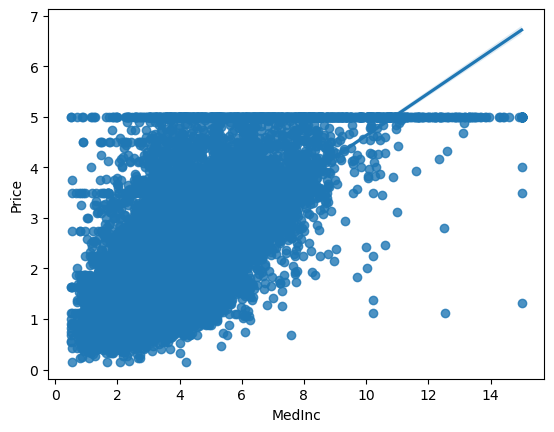

In [21]:
sns.regplot(x="MedInc", y="Price", data=dataset)

<Axes: xlabel='Population', ylabel='Price'>

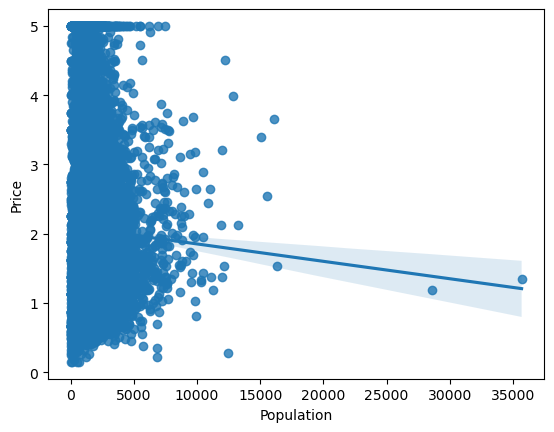

In [22]:
sns.regplot(x="Population", y="Price", data=dataset)

In [23]:
# Independent & Dependent features

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [24]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [28]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8085,3.4808,45.0,4.891192,0.922280,533.0,2.761658,33.81,-118.20
6330,4.9932,18.0,6.211813,1.036660,3112.0,3.169043,33.99,-117.94
6615,3.2813,48.0,5.500000,1.133663,421.0,2.084158,34.17,-118.10
4331,2.4196,46.0,3.881905,1.017143,1250.0,2.380952,34.08,-118.32
2638,1.5625,22.0,4.358639,1.060209,826.0,2.162304,40.59,-124.14


In [29]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2333,4.9327,8.0,6.083871,1.219355,475.0,3.064516,36.83,-119.69
13166,3.6354,17.0,5.457380,1.064449,1487.0,3.091476,36.84,-121.38
8671,5.1589,35.0,5.183362,1.057725,1311.0,2.225806,33.82,-118.38
7158,1.5078,22.0,3.966844,1.049072,2486.0,3.297082,34.04,-118.16
4146,4.0052,30.0,4.237736,1.036478,2032.0,2.555975,34.13,-118.20


In [30]:
## Scaling dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-0.20891296,  1.29300184, -0.20809361, ..., -0.02683673,
        -0.85798656,  0.68963198],
       [ 0.58715285, -0.85230025,  0.29546649, ...,  0.01173611,
        -0.77392259,  0.81882449],
       [-0.31392164,  1.53136873,  0.02404838, ..., -0.09098514,
        -0.68985862,  0.73932141],
       ...,
       [-0.52778143, -1.24957841,  0.40163993, ..., -0.05775989,
         0.84664394, -0.06564727],
       [ 0.96928971, -1.09066714,  0.36544987, ...,  0.01266857,
         0.90268659, -1.17869038],
       [-0.68132044, -0.05774392,  0.03199225, ...,  0.05609154,
         0.3142388 , -0.0457715 ]])

In [34]:
X_test

array([[ 0.55530811, -1.64685657,  0.24668163, ...,  0.0018391 ,
         0.55242005, -0.05074044],
       [-0.12753781, -0.93175588,  0.00779731, ...,  0.00439178,
         0.55709027, -0.89049172],
       [ 0.67437059,  0.49844551, -0.09668759, ..., -0.07757333,
        -0.85331633,  0.60019102],
       ...,
       [-0.38645396,  1.29300184, -0.28259089, ..., -0.10867402,
        -0.69919906,  0.66975621],
       [ 0.89838911, -0.69338898,  0.0917853 , ...,  0.06622377,
         0.94471858, -1.43210644],
       [-0.85128186,  1.13409057, -0.67317641, ..., -0.00256045,
         0.99142078, -1.30291394]])

## Model Training

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [36]:
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
## print model coefficients and intercept
print(regressor.coef_)

[ 0.82535496  0.1193164  -0.26461313  0.31002139 -0.00752417 -0.04805503
 -0.91346674 -0.88465382]


In [38]:
print(regressor.intercept_)

2.073525395210407


In [39]:
## model train parameters
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Model Prediction

In [40]:
reg_pred = regressor.predict(X_test)

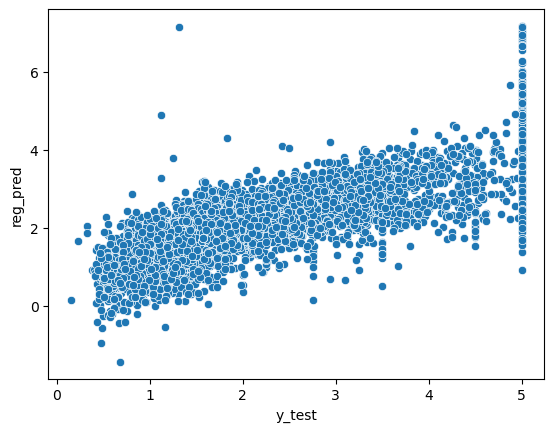

In [41]:
# scatter plot for prediction
sns.scatterplot(x=y_test, y=reg_pred)

plt.xlabel("y_test")
plt.ylabel("reg_pred")
plt.show()

In [42]:
# residual error
residuals = y_test - reg_pred

In [43]:
residuals

2333    -0.996291
13166    0.098064
8671     1.447287
7158     0.669329
4146    -0.297008
           ...   
3335    -0.210206
15869   -0.171336
5783     0.824966
16786    0.014076
256     -0.988727
Name: Price, Length: 6192, dtype: float64

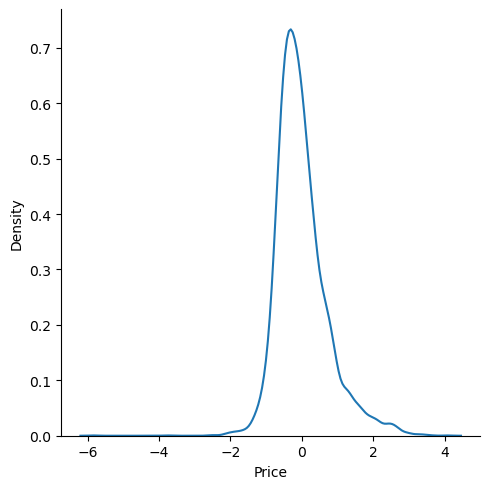

In [44]:
# plot residuals
sns.displot(residuals, kind="kde")

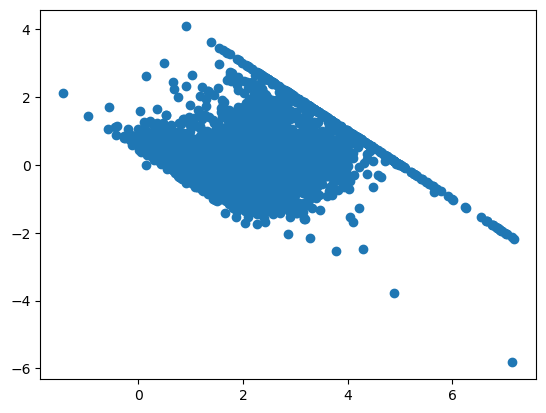

In [45]:
# scatter plot wrt prediction and residuals
# sns.scatterplot(x=reg_pred, y=residuals)
plt.scatter(reg_pred, residuals)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))

0.5281198838427056
0.5120158525767818


# R square & adjusted R square

##### Formula

**`R^2 = 1 - SSR/SST`**

+ **R^2** = *coefficient of determination*
+ **SSR** = *sum of squares of residuals*
+ **SST** = *total sum of squares*

In [48]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.6045887160886988


##### Formula

**`adjusted R^2 = 1 - [(1 - R^2) * (n - 1) / (n - k - 1)]`**

+ **R^2** = *the R^2 of the model*
+ **n** = *the number of observations*
+ **k** = *the number of predictions*

In [51]:
# display adjusted r2_score
adjusted_score = 1 - ((1 - score) * (len(y_test) - 1) / (len(y_test - X_test.shape[1] - 1)))

print(adjusted_score)

0.6046525745001832


### New Data Prediction

In [57]:
cali_data.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [60]:
# transformation of new data
scaler.transform(cali_data.data[0].reshape(1, -1))

array([[ 2.34098206,  0.97517931,  0.58995426, -0.14207456, -0.95523212,
        -0.04635135,  1.04279321, -1.31285182]])

In [61]:
regressor.predict(scaler.transform(cali_data.data[0].reshape(1, -1)))

array([4.14014286])

In [62]:
cali_data.target[0]

4.526

### Pickling the Model file for Deployment

In [63]:
import pickle

In [64]:
pickle.dump(regressor, open("regressor.pkl", "wb"))

In [65]:
 pkld_model = pickle.load(open("regressor.pkl", "rb"))

In [67]:
# prediction with pickled model
pkld_model.predict(scaler.transform(cali_data.data[0].reshape(1, -1)))

array([4.14014286])